In [94]:
import tarfile
from sklearn.feature_selection import SelectKBest
from speech import *
from sklearn.feature_selection import SelectKBest, chi2,f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import scipy 
import copy

In [103]:
tar = tarfile.open("data/speech.tar.gz", "r:gz")


class Data: pass


speech = Data()
print("-- train data")
speech.train_data, speech.train_fnames, speech.train_labels = read_tsv(tar, "train.tsv")
print(len(speech.train_data))
print("-- dev data")
speech.dev_data, speech.dev_fnames, speech.dev_labels = read_tsv(tar, "dev.tsv")
print(len(speech.dev_data))
print("-- transforming data and labels")
print("-- transforming data and labels")

-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
-- transforming data and labels


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
speech.count_vect = CountVectorizer(max_df=0.5, max_features=5000, ngram_range=(1, 1))
speech.trainX = speech.count_vect.fit_transform(speech.train_data)
speech.devX = speech.count_vect.transform(speech.dev_data)

ty =speech.train_labels
g  = ty

In [57]:
'''
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=3,error_score='raise')
    grid_search.fit(speech.train_data, speech.train_labels)
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    
 '''

'\n    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=3,error_score=\'raise\')\n    grid_search.fit(speech.train_data, speech.train_labels)\n    print("Best score: %0.3f" % grid_search.best_score_)\n    print("Best parameters set:")\n    best_parameters = grid_search.best_estimator_.get_params()\n    \n '

In [104]:
print("Reading unlabeled data")
unlabeled = read_unlabeled("data/speech.tar.gz", speech)

Reading unlabeled data


AttributeError: 'Data' object has no attribute 'count_vect'

In [ ]:
transformer = SelectKBest(k=1000)
transformed_train_data = transformer.fit_transform(speech.trainX, ty)
transformed_unlabeled = transformer.transform(unlabeled.X)
print('f')


In [116]:

from sklearn import metrics    

def self_learning(train_data,dl):
    d = copy.deepcopy(dl)
    train_data_ = copy.deepcopy(train_data)
    model = SGDClassifier()
    a= []
    for i in range(5000):
        model.fit(train_data_,d)
        new_label = model.predict(transformed_unlabeled [i])
        d.append(new_label[0])
        train_data_ = scipy.sparse.vstack((train_data_,transformed_unlabeled [i]))
        yp = model.predict(train_data)
        acc = metrics.accuracy_score(dl, yp)
        print(str(acc) + " len " + str(len(d)))
        a.append(acc)
    return train_data_, d, a



a,b,c = self_learning(transformed_train_data,ty)
print("aa")

0.6935926773455378 len 4371
0.6894736842105263 len 4372
0.6881006864988558 len 4373
0.6844393592677346 len 4374
0.6981693363844393 len 4375
0.6848970251716248 len 4376
0.6874141876430206 len 4377
0.682837528604119 len 4378
0.6972540045766591 len 4379
0.6949656750572082 len 4380
0.6986270022883295 len 4381
0.6926773455377574 len 4382
0.6935926773455378 len 4383
0.6883295194508009 len 4384
0.6892448512585813 len 4385
0.6954233409610984 len 4386
0.6897025171624714 len 4387
0.6878718535469107 len 4388
0.6919908466819222 len 4389
0.6919908466819222 len 4390
0.6883295194508009 len 4391
0.6897025171624714 len 4392
0.6816933638443936 len 4393
0.6958810068649885 len 4394
0.6887871853546911 len 4395
0.6874141876430206 len 4396
0.6972540045766591 len 4397
0.6867276887871854 len 4398
0.6860411899313501 len 4399
0.7006864988558352 len 4400
0.6924485125858123 len 4401
0.688558352402746 len 4402
0.6935926773455378 len 4403
0.6908466819221968 len 4404
0.6862700228832952 len 4405
0.6954233409610984 len

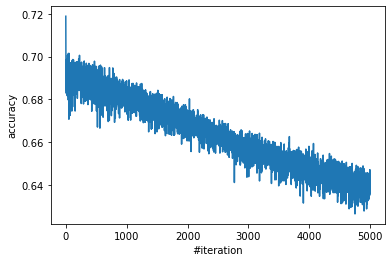

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

x = range(1,5001,1)
y = c
model=make_interp_spline(x, y)
xs = np.linspace(0, 5000, 5000)
ys = model(xs)
plt.plot(xs, ys)
plt.xlabel("#iteration")
plt.ylabel("accuracy")

plt.savefig('output.png', dpi=300, bbox_inches='tight')

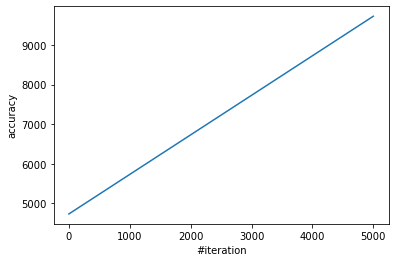

In [121]:
x = range(1,5001,1)
y = range(4730,4730+5000,1)
model=make_interp_spline(x, y)
xs = np.linspace(0, 5000, 5000)
ys = model(xs)
plt.plot(xs, ys)
plt.xlabel("#iteration")
plt.ylabel("accuracy")

plt.savefig('output1.png', dpi=300, bbox_inches='tight')